In [4]:
using Revise, SLAM, Plots

  ** incremental compilation may be fatally broken for this module **



In [5]:
θ = π / 4
R_gt =[cos(θ) -sin(θ) ; sin(θ) cos(θ)]
t_gt = [-2, 5]

# gen points
n = 30
unmoved = Pt[]
moved = Pt[]
xs = collect(range(0, n))
for i in 1:30
    y = 0.2 * xs[i] * sin(0.5 * xs[i])
    push!(moved, R_gt * [xs[i], y] + t_gt)
    push!(unmoved, Pt([xs[i], y]))
end

P = moved;
Q = unmoved;

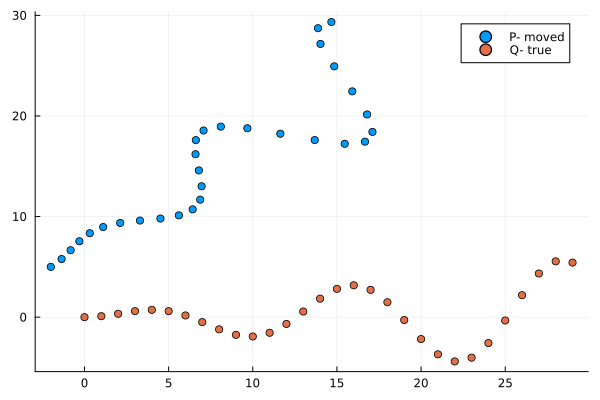

In [6]:
function plot_scans(P, Q)
    pxs = Float64[]
    pys = Float64[]
    for pt in P
        push!(pxs, pt.x)
        push!(pys, pt.y)
    end
    qxs = Float64[]
    qys = Float64[]
    for pt in Q
        push!(qxs, pt.x)
        push!(qys, pt.y)
    end
    
    scatter(pxs, pys, label="P- moved")
    scatter!(qxs, qys, label="Q- true")

end
plot_scans(P, Q)

In [7]:
centeredP, centerP = center_scan(P);
centeredQ, centerQ = center_scan(Q);

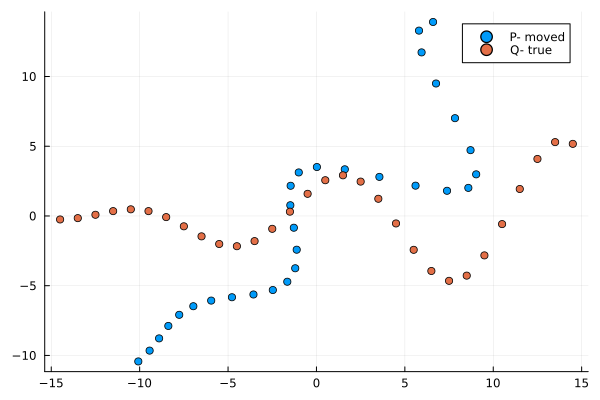

In [8]:
plot_scans(centeredP, centeredQ)

In [9]:
idxs = correspondence_idxs(centeredP, centeredQ)

30-element Vector{Tuple{Int64, Int64}}:
 (1, 10)
 (2, 10)
 (3, 10)
 (4, 10)
 (5, 10)
 (6, 10)
 (7, 10)
 (8, 11)
 (9, 11)
 (10, 12)
 ⋮
 (22, 20)
 (23, 27)
 (24, 27)
 (25, 28)
 (26, 28)
 (27, 28)
 (28, 17)
 (29, 29)
 (30, 29)

In [10]:
cov, _ = cross_covariance(centeredP, centeredQ, idxs)

([1113.9727460470756 1153.7187012181823; 367.3994855621959 478.8189039605895], Int64[])

In [11]:
using LinearAlgebra

F = svd(cov)

R_calc = F.U * F.Vt
t_calc = centerQ - R_calc * centerP

display(R_calc)
display(t_calc)

2×2 StaticArraysCore.SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
  0.896685  0.44267
 -0.44267   0.896685

2-element StaticArraysCore.SVector{2, Float64} with indices SOneTo(2):
   0.4278781961137348
 -10.010558867093492

In [12]:
new_P = Pt[]
for pt in P
    new_pt = R_calc * pt  + t_calc
    push!(new_P, new_pt)
end

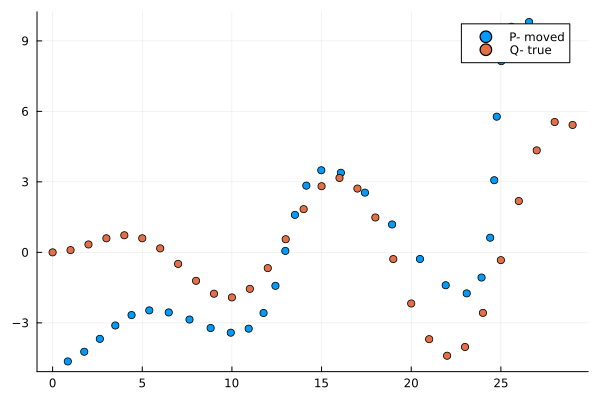

In [13]:
plot_scans(new_P, Q)

In [14]:
odom_mtx, icp_P = icp_svd(P, Q)

([1.0000000000000002 2.0816681711721685e-17 -1.7763568394002505e-15; -6.938893903907228e-18 0.9999999999999999 1.6653345369377348e-16; 0.0 0.0 1.0], StaticArraysCore.SVector{2, Float64}[[-3.5995512126516775e-17, 1.9428902930940124e-16], [0.9999999999999993, 0.09588510772084047], [1.9999999999999987, 0.33658839392315937], [2.9999999999999996, 0.5984969919624332], [3.9999999999999982, 0.7274379414605461], [4.9999999999999964, 0.5984721441039551], [5.999999999999998, 0.16934400967184132], [6.999999999999997, -0.4910965187654666], [7.9999999999999964, -1.2108839924926842], [8.999999999999993, -1.7595542117971734]  …  [19.999999999999986, -2.1760844435574787], [20.999999999999993, -3.694722191881014], [22.0, -4.399956908823092], [22.999999999999993, -4.027080003566767], [24.000000000000007, -2.575550006402088], [25.0, -0.33160948675600427], [26.0, 2.184868591498533], [26.999999999999993, 4.340435903378753], [27.999999999999993, 5.547401191891271], [29.0, 5.4223913220431585]])

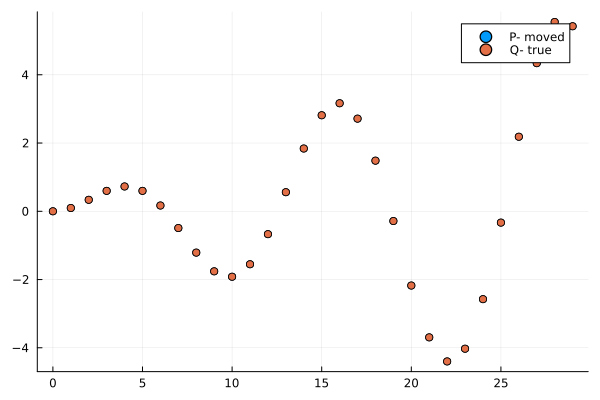

In [15]:
plot_scans(icp_P, Q)

In [16]:
""" What makes sense as a good norm over the scan?
    1) sum of the norms of diff of each pt
    2) 
"""
function norm_scans(P, Q)
    total = 0.
    for p in P, q in Q
        total += sum((p - q).^2)
    end
    sqrt(total)
end

norm_scans

In [17]:
norm_scans(P, Q)

382.1633316586021

In [18]:
norm_scans(new_P, Q)

382.163331658602